In [14]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd
import csv
import math
from collections import Counter
import matplotlib.pyplot as plt

s=pd.read_csv('../Data/2019/2019_TFIDF.csv',encoding='utf-8')

In [15]:
# import re
# news_topic = []
# word_length = 0
# for article in s['N_list']:
#     text = re.sub(r'[,\[\]\']', '', article)
#     word_length += len(text.strip())
#     news_topic.append(text)

# print(len(news_topic))
s.head()

,Unnamed: 0,N_list,category,date,headline,img,press,text,url,topics
0,0,"[['문희상', '국회', '의장', '새해', '대한민국', '임시', '정부',...",정치,2019/01/01,문희상 “임시정부 100년…새 역사 시작하는 새해 될 것”,['http://img.hani.co.kr/imgdb/resize/2018/1231...,한겨레,"문희상 국회의장이 2019년 새해를 “대한민국 임시정부 100년, 임시의정원 100...",http://www.hani.co.kr/arti/politics/politics_g...,"의장, 대한민국, 신년사, 질곡, 임시, 국회, 퇴보, 역경, 절체절명, 혼신"
1,1,"[['경남', '한국', '승강기', '안전', '공단', '지역', '상생', '...","경제,지역",2019/01/01,경남 승강기안전공단 지역과 상생 동반성장 활동,[],세계일보,경남 한국승강기안전공단이 지역과 상생하며 동반성장하는 다양한 활동에 나서고 있다. ...,http://www.segye.com/content/html/2018/12/31/2...,"지역, 인재, 채용, 공단, 자매결연, 신규, 농산물, 진주, 농촌, 마을"
2,2,"[['문재인', '대통령', '겨울', '세상', '촛불', '마음', '삶', '...",정치,2019/01/01,문 대통령 신년사 “한 분 한 분의 삶 나아지도록 노력하겠다”,['https://pds.joins.com/news/component/htmlpho...,중앙일보,"문재인 대통령은 1일 “이 겨울, 더 따뜻하게 세상을 밝히라는 촛불의 마음 결코 잊...",http://news.joins.com/article/olink/22844371,"대통령, 신년사, 평화, 오찬, 새해, 지도부, 마지막, 여당, 국정, 마음"
3,3,"[['올해', '웻', '이징', '숙성', '한우', '등심', '할인', '가격...",경제,2019/01/01,"이마트, 올해 상반기 ‘한우 등심’ 초저가로 가격 동결",['https://dimg.donga.com/wps/NEWS/IMAGE/2018/1...,동아일보,올해 7월까지 ‘웻(Wet)에이징’ 숙성 한우 등심 33% 할인된 가격으로 동결바이...,http://news.donga.com/3/all/20181231/93504466/3,"한우, 등심, 가격, 숙성, 이마트, 미트, 이징, 상승, 바이어, 도매"
4,4,"[['지난해', '국회', '신설', '익명', '단체', '국회', '페', '미...","사회,정치",2019/01/01,"“그 비서 몸매 좋던데”…국회 페미 “페미니즘=시대정신, 국회부터 바뀌어야”",['http://image.kmib.co.kr/online_image/2019/01...,국민일보,지난해 8월 16일 국회 내에 신설된 익명 단체인 ‘국회 페미’가 최근 언론 인터뷰...,http://news.kmib.co.kr/article/view.asp?arcid=...,"여성, 국회, 행비, 남성, 의원, 외모, 이도, 보좌관, 비서, 차별"


In [54]:
news_topic = s['topics'].tolist()

# # CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_topic)
print(X.shape)
X = normalize(X)

neigh = NearestNeighbors(n_neighbors=19)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)


(126092, 73606)


In [55]:
distances.shape

(126092, 19)

In [56]:
distances = np.sort(distances, axis=0) #역방향
distances = distances[:,1]

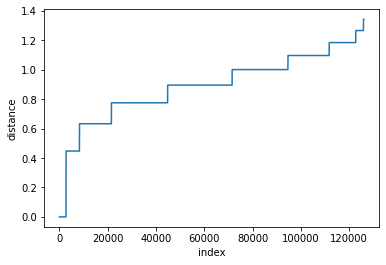

In [57]:
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]

plt.xlabel('index')
plt.ylabel('distance')
plt.plot(distances)

In [11]:
m = DBSCAN(eps=0.78, min_samples = 20)
db_clusters = m.fit(X)

labels = m.labels_
s['labels'] = labels

hot_topic_index = Counter(s['labels']).most_common()
hot_topic = dict(hot_topic_index)

print(hot_topic)

KeyboardInterrupt: 

In [13]:
index = []
for row in s['labels']:
    index.append(hot_topic[row])

s['cnt'] = index
len(s)
s = s[s['labels'] != -1]
s.sort_values(by='cnt', ascending=False).to_csv('../Data/2019/2019_TFIDF_10_DBSCAN_9.csv', index=False, header=True, encoding="utf-8-sig")